In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = sns.load_dataset("titanic")
print('There is {} rows and {} columns'.format(df.shape[0],df.shape[1]))
df.head()

There is 891 rows and 15 columns


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
drop = ['pclass', 'embarked', 'alone']
df.drop(drop,axis=1,inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   sex          891 non-null    object  
 2   age          714 non-null    float64 
 3   sibsp        891 non-null    int64   
 4   parch        891 non-null    int64   
 5   fare         891 non-null    float64 
 6   class        891 non-null    category
 7   who          891 non-null    object  
 8   adult_male   891 non-null    bool    
 9   deck         203 non-null    category
 10  embark_town  889 non-null    object  
 11  alive        891 non-null    object  
dtypes: bool(1), category(2), float64(2), int64(3), object(4)
memory usage: 65.9+ KB


In [5]:
df['deck'] = df['deck'].astype('O')
df['class'] = df['class'].astype('O')

In [6]:
## Null Value Check
total = df.isnull().mean()
total

survived       0.000000
sex            0.000000
age            0.198653
sibsp          0.000000
parch          0.000000
fare           0.000000
class          0.000000
who            0.000000
adult_male     0.000000
deck           0.772166
embark_town    0.002245
alive          0.000000
dtype: float64

## Missing Value Imputation

In [7]:
values = {'age': df['age'].median()}
df = df.fillna(value=values)

In [8]:
df['deck'].fillna('missing', inplace=True)

In [9]:
df['embark_town'].fillna('missing', inplace=True)

In [10]:
## Null Value Check
total = df.isnull().mean()
total

survived       0.0
sex            0.0
age            0.0
sibsp          0.0
parch          0.0
fare           0.0
class          0.0
who            0.0
adult_male     0.0
deck           0.0
embark_town    0.0
alive          0.0
dtype: float64

In [11]:
df.head()

,survived,sex,age,sibsp,parch,fare,class,who,adult_male,deck,embark_town,alive
0,0,male,22.0,1,0,7.2500,Third,man,True,missing,Southampton,no
1,1,female,38.0,1,0,71.2833,First,woman,False,C,Cherbourg,yes
2,1,female,26.0,0,0,7.9250,Third,woman,False,missing,Southampton,yes
3,1,female,35.0,1,0,53.1000,First,woman,False,C,Southampton,yes
4,0,male,35.0,0,0,8.0500,Third,man,True,missing,Southampton,no


In [12]:
df.to_csv('titanic.csv', index=False)

## Analysis

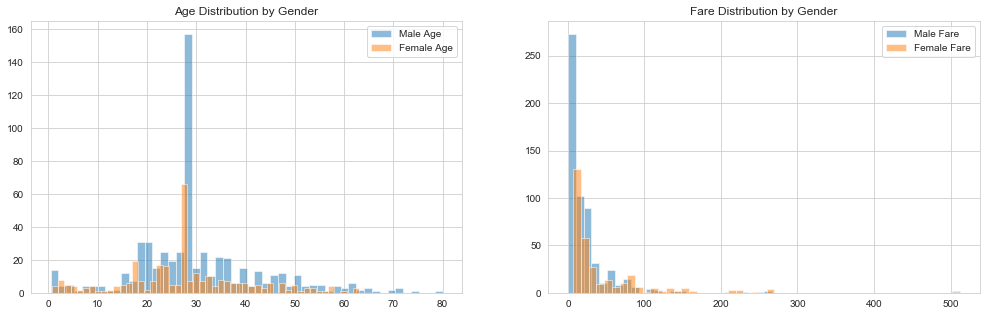

In [13]:
sns.set_style('whitegrid')
plt.figure(figsize = (17,5))

plt.subplot(1,2,1)

m_age = df[df['sex'] == 'male']['age']
f_age = df[df['sex'] == 'female']['age']

plt.hist(m_age, bins = 50, label = 'Male Age', alpha = 0.5)
plt.hist(f_age, bins = 50, label = 'Female Age', alpha = 0.5);

plt.title('Age Distribution by Gender')

plt.legend(loc = 'best')

plt.subplot(1,2,2)

m_fare = df[df['sex'] == 'male']['fare']
f_fare = df[df['sex'] == 'female']['fare']

plt.hist(m_fare, bins = 50, label = 'Male Fare', alpha = 0.5)
plt.hist(f_fare, bins = 50, label = 'Female Fare', alpha = 0.5);

plt.title('Fare Distribution by Gender')

plt.legend(loc = 'best')

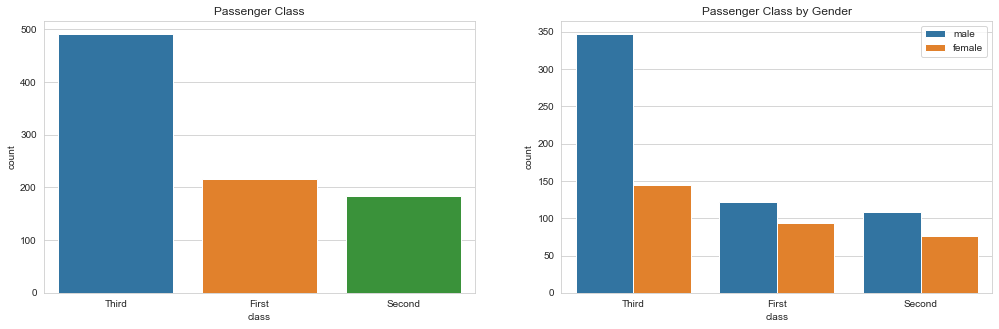

In [14]:
plt.figure(figsize = (17,5))

plt.subplot(1,2,1)
sns.countplot(x = 'class', data = df)
plt.title('Passenger Class')

plt.subplot(1,2,2)
sns.countplot(x = 'class',hue = 'sex', data = df)
plt.title('Passenger Class by Gender')
plt.legend(loc = 'best')

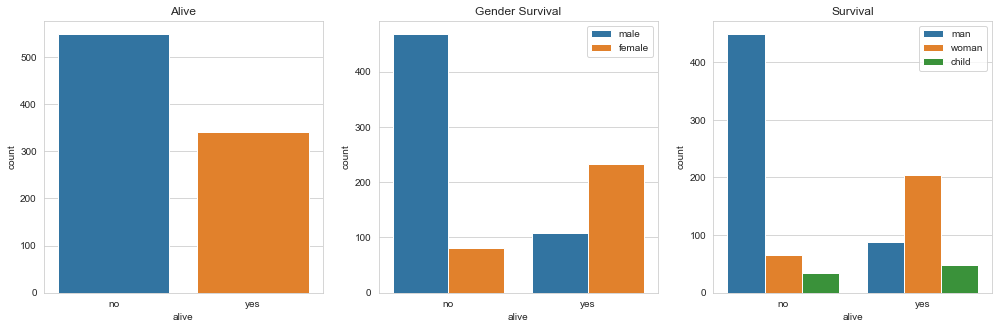

In [15]:
plt.figure(figsize = (17,5))

plt.subplot(1,3,1)
sns.countplot(x = 'alive', data = df)
plt.title('Alive')

plt.subplot(1,3,2)
sns.countplot(x = 'alive',hue = 'sex', data = df)
plt.title('Gender Survival')
plt.legend(loc = 'best')

plt.subplot(1,3,3)
sns.countplot(x = 'alive',hue = 'who', data = df)
plt.title('Survival')
plt.legend(loc = 'best')

In [16]:
class_sex = df.groupby(['class', 'who'])['alive'].count().unstack()
class_sex

who,child,man,woman
class,,,
First,6,119,91
Second,19,99,66
Third,58,319,114


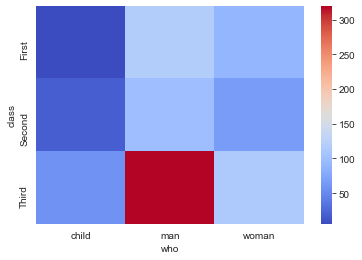

In [17]:
sns.heatmap(class_sex, cmap = 'coolwarm')

In [18]:
embark_sex = df.groupby(['embark_town', 'who'])['alive'].count().unstack()
embark_sex

who,child,man,woman
embark_town,,,
Cherbourg,18.0,90.0,60.0
Queenstown,5.0,37.0,35.0
Southampton,60.0,410.0,174.0
missing,NaN,NaN,2.0


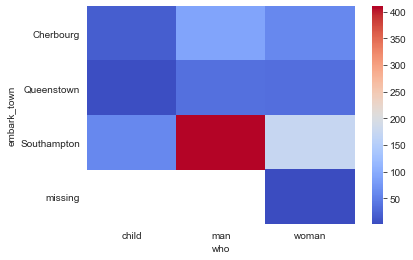

In [19]:
sns.heatmap(embark_sex, cmap = 'coolwarm')

In [20]:
## Pearson Correlation Assumptions:

## Variables are Normally Distributed
## No Significant Outliers
## The relationship between the variables is approximately linear

## If assumptions not met, perform nonparametric Spearmans correlation

In [21]:
## Normality Tests

# example of the shapiro-wilk test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro

cols = ['age', 'fare']
for i in cols:
    print(i)
    stat, p = shapiro(df[i])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')
    print('---------------------')

age
Statistics=0.954, p=0.000
Sample does not look Gaussian (reject H0)
---------------------
fare
Statistics=0.522, p=0.000
Sample does not look Gaussian (reject H0)
---------------------


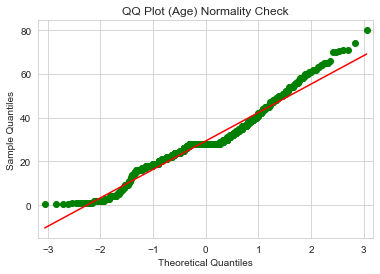

In [22]:
from statsmodels.graphics.gofplots import qqplot

qqplot(df['age'], line='s', c='g')
plt.title('QQ Plot (Age) Normality Check')
plt.show()

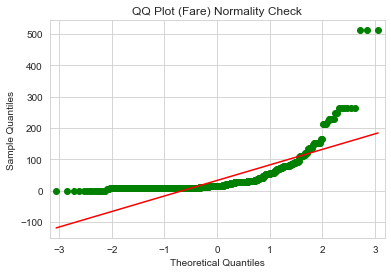

In [23]:
qqplot(df['fare'], line='s', c='g')
plt.title('QQ Plot (Fare) Normality Check')
plt.show()

In [24]:
# identify outliers with interquartile range
from numpy.random import seed
from numpy.random import randn
from numpy import percentile

cols = ['age', 'fare']

# calculate interquartile range
for i in cols:
    q25, q75 = percentile(df[i], 25), percentile(df[i], 75)
    iqr = q75 - q25
    print(i)
    print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    # identify outliers
    outliers = [x for x in df[i] if x < lower or x > upper]
    print('Identified outliers: %d' % len(outliers))
    # remove outliers
    outliers_removed = [x for x in df[i] if x >= lower and x <= upper]
    print('Non-outlier observations: %d' % len(outliers_removed))
    print('----------------------------------------------')

age
Percentiles: 25th=22.000, 75th=35.000, IQR=13.000
Identified outliers: 66
Non-outlier observations: 825
----------------------------------------------
fare
Percentiles: 25th=7.910, 75th=31.000, IQR=23.090
Identified outliers: 116
Non-outlier observations: 775
----------------------------------------------


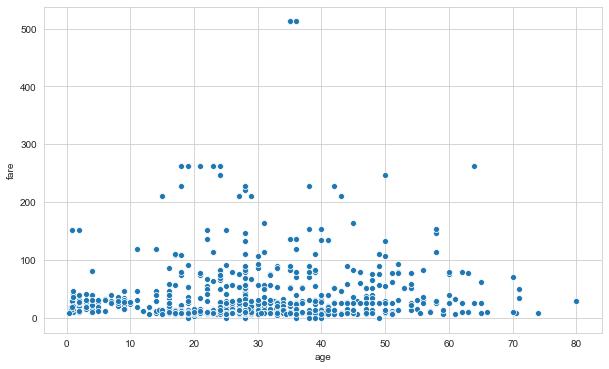

In [25]:
## Linearity

cols = ['age', 'fare']
combo = []
for i in range(len(cols)):
    for j in range(i+1, len(cols)):
        combo.append((i,j))

for i in range(len(combo)):
    plt.figure(figsize = (10,6))
    sns.scatterplot(data=df, x=cols[combo[i][0]], y=cols[combo[i][1]])

In [26]:
# Calculate the spearman's correlation between two variables
from numpy.random import rand
from numpy.random import seed
from scipy.stats import spearmanr

cols = ['age', 'fare']
combo = []
for i in range(len(cols)):
    for j in range(i+1, len(cols)):
        combo.append((i,j))

# calculate spearman's correlation
for i in range(len(combo)):
    print(cols[combo[i][0]]+' vs '+cols[combo[i][1]])
    coef, p = spearmanr(df[cols[combo[i][0]]], df[cols[combo[i][1]]])
    print('Spearmans correlation coefficient: %.3f' % coef)

    # interpret the significance
    alpha = 0.05
    if p > alpha:
        print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
    else:
        print('Samples are correlated (reject H0) p=%.3f' % p)
    
    print('--------------------------------------------')

age vs fare
Spearmans correlation coefficient: 0.126
Samples are correlated (reject H0) p=0.000
--------------------------------------------


## Chi Square Goodness Of Fit Tests

### Class Variable

![title](chi-class.png)

The chi square value is seventy 191.80 with two degrees of freedom and the P-value is very low. It is lower than 5 percent. So we are going to reject the null hypothesis and say that the class levels do not have an equal distribution.

### Embark Town Variable

![title](chi-embark-town.png)

The chi square value is seventy 1124.20 with three degrees of freedom and the P-value is very low. It is lower than 5 percent. So we are going to reject the null hypothesis and say that the embark town levels do not have an equal distribution.

### Who Variable

![title](chi-who.png)

The chi square value is seventy 350.41 with two degrees of freedom and the P-value is very low. It is lower than 5 percent. So we are going to reject the null hypothesis and say that the 'who' levels do not have an equal distribution.

### Deck Variable

![title](chi-deck.png)

The chi square value is seventy 3432.70 with seven degrees of freedom and the P-value is very low. It is lower than 5 percent. So we are going to reject the null hypothesis and say that the deck levels do not have an equal distribution.

## Chi Square Test of Association

In [27]:
## Categorical variables: sex, class, who, embark town, alive, deck

## Comparisons: sex vs class
## Comparisons: sex vs who
## Comparisons: sex vs embark town
## Comparisons: sex vs alive
## Comparisons: sex vs deck

## Comparisons: class vs who
## Comparisons: class vs embark town
## Comparisons: class vs alive
## Comparisons: class vs deck

## Comparisons: who vs embark town
## Comparisons: who vs alive
## Comparisons: who vs deck

## Comparisons: embark town vs alive
## Comparisons: embark town vs deck

## Comparisons: alive vs deck

![title](sex-class-chi.png)

From the above, the P value is less than 5%, thus there is a significant relationship between sex and class variable. With a Cramer V value of 0.13. Thus, highlighting a weak relationship

![title](sex-who-chi.png)

From the above, the P value is less than 5%, thus there is a significant relationship between sex and who variables. With a Cramer V value of 0.94. Thus, highlighting a strong relationship

![title](sex-embark-chi.png)

From the above, since some expected counts < 5, the Fishers exact test is used. The P value is less than 5%. Thus, there is a significant relationship between sex and embark_town variables. The Cramer V value is 0.13 indicating a weak relationship.

![title](sex-alive-chi.png)

From the above, the P value is less than 5%, thus there is a significant relationship between sex and alive variables. With a Cramer V value of 0.54. Thus, highlighting a moderate relationship

![title](sex-deck-chi.png)

From the above, since some expected counts < 5, the Fishers exact test is used. The P value is less than 5%. Thus, there is a significant relationship between sex and deck variables. The Cramer V value is 0.20 indicating a weak relationship.

![title](class-who-chi.png)

From the above, the P value is less than 5%, thus there is a significant relationship between class and who variables. With a Cramer V value of 0.14. Thus, highlighting a weak relationship.

![title](class-embark-chi.png)

From the above, the P value is less than 5%, thus there is a significant relationship between class and embark variables. With a Cramer V value of 0.26. Thus, highlighting a weak relationship.

![title](class-alive-chi.png)

From the above, the P value is less than 5%, thus there is a significant relationship between class and alive variables. With a Cramer V value of 0.33. Thus, highlighting a weak-moderate relationship.

![title](class-deck-chi.png)

From the above, since some expected counts < 5, the Fishers exact test is used. The P value is less than 5%. Thus, there is a significant relationship between class and deck variables. The Cramer V value is 0.60 indicating a moderate relationship.

![title](who-embark-chi.png)

From the above, since some expected counts < 5, the Fishers exact test is used. The P value is less than 5%. Thus, there is a significant relationship between who and embark variables. The Cramer V value is 0.10 indicating a weak relationship.

![title](who-alive-chi.png)

From the above, the P value is less than 5%, thus there is a significant relationship between who and alive variables. With a Cramer V value of 0.56. Thus, highlighting a moderate relationship.

![title](who-deck-chi.png)

From the above, since some expected counts < 5, the Fishers exact test is used. The P value is less than 5%. Thus, there is a significant relationship between who and deck variables. The Cramer V value is 0.18 indicating a weak relationship.

![title](embark-alive-chi.png)

From the above, since some expected counts < 5, the Fishers exact test is used. The P value is less than 5%. Thus, there is a significant relationship between embark_town and alive variables. The Cramer V value is 0.18 indicating a weak relationship.

![title](embark-deck-chi.png)

From the above, since some expected counts < 5, the Fishers exact test is used. The P value is less than 5%. Thus, there is a significant relationship between embark_town and deck variables. The Cramer V value is 0.20 indicating a weak relationship.

![title](alive-deck-chi.png)

From the above, since some expected counts < 5, the Fishers exact test is used. The P value is less than 5%. Thus, there is a significant relationship between alive and deck variables. The Cramer V value is 0.33 indicating a weak-moderate relationship.

## Mann Whitney Test

In [28]:
## Is there a significant difference in average age between those who survived or not?

In [29]:
df['age'] = df['age'].astype(int)

In [30]:
df1 = df.loc[:,['alive', 'age']]
df1.to_csv('alive_age.csv', index=False)

![title](age-alive-wil.png)

The P value > 5%, thus we fail to reject the null hypothesis and say there is no significant difference in the medians of the two groups (alive or not alive) with respect to age

In [31]:
## Is there a significant difference in average fare between the sex variable (male or female)?

In [32]:
df1 = df.loc[:,['sex', 'fare']]
df1.to_csv('sex_fare.csv', index=False)

![title](sex-fare-wil.png)

![title](sex-fare-wil2.png)

The P value < 5%, thus we reject the null hypothesis and say there is a significant difference in the medians of the two groups (male or female) with respect to fare paid. Females paid an average fare of 23, whereas males paid an average fare of 10.5

## Kruskal Wallis Test

In [33]:
## Is there a significant difference in average fare between the class variable (first or second or third)?

In [34]:
df1 = df.loc[:,['fare', 'class']]
df1.to_csv('fare_class.csv', index=False)

![title](fare-class-krus.png)

![title](fare-class-krus2.png)

The P value < 5%. Thus we reject the null hypothesis and state that there is a significant difference in the medians of the three groups (first class, second class and third class) with respect to average fare paid. The fares increased on average from third class to first class.

In [35]:
## Is there a significant difference in average age between the class variable (first or second or third)?

In [36]:
df1 = df.loc[:,['age', 'class']]
df1.to_csv('age_class.csv', index=False)

![title](age-class-krus.png)

![title](age-class-krus2.png)

The P value < 5%. Thus we reject the null hypothesis and state that there is a significant difference in the medians of the three groups (first class, second class and third class) with respect to average age. The difference is particulary seen in the older ages of those who are in first class compared to those in lower classes

In [37]:
## Is there a significant difference in average fare between the embark_town variable?

In [38]:
df1 = df.loc[:,['fare', 'embark_town']]
df1.to_csv('fare_embark.csv', index=False)

![title](fare-embark-krus.png)

![title](fare-embark-krus2.png)

The P value < 5%. Thus we reject the null hypothesis and state that there is a significant difference in the medians of the  embark_town groups with respect to average fare. Queenstown was the cheapest on average, followed by Southampton, followed by Cherbourg and finally the 'missing' variable. 

In [39]:
## Is there a significant difference in average age between the embark_town variable?

In [40]:
df1 = df.loc[:,['age', 'embark_town']]
df1.to_csv('age_embark.csv', index=False)

![title](age-embark-krus.png)

The P value > 5%, thus we fail to reject the null hypothesis and say there is no significant difference in the medians of the embark_town groups with respect to age.

## Questions

AxesSubplot(0.125,0.125;0.775x0.755)
Min Fare: 0.000
Average Fare: 14.454
Max Fare: 512.329


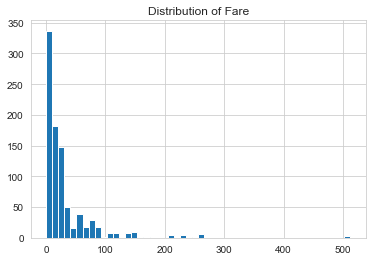

In [41]:
## What is the lowest/highest/average fare that passengers paid?

print(df['fare'].hist(bins = 50))
plt.title('Distribution of Fare')
print('Min Fare: {:.3f}'.format(df['fare'].min()))
print('Average Fare: {:.3f}'.format(df['fare'].median())) #<- median better measure of central tendency than mean for skewed distributions
print('Max Fare: {:.3f}'.format(df['fare'].max()))

In [42]:
## Given that a person paid high fare. What is the probability that they survived? P(survived | high fare)

average = df['fare'].median()
p_survive_high_fare = (df[df['fare'] > average]['survived'] == 1).mean()
print('P(Survived | High Fare): {:.3f}'.format(p_survive_high_fare))

## Given that a person paid low fare. What is the probability that they survived? P(survived | low fare)
p_survive_low_fare = (df[df['fare'] < average]['survived'] == 1).mean()
print('P(Survived | Low Fare): {:.3f}'.format(p_survive_low_fare))

## Given that a person paid the average fare. What is the probability that they survived? P(survived | average fare)
p_survive_av_fare = (df[df['fare'] == average]['survived'] == 1).mean()
print('P(Survived | Average Fare): {:.3f}'.format(p_survive_av_fare))

## Note: An alternative method would be to create a categorical column called fare_type with high-average-low fares and perform:
## df.groupby('fare_type')['survived'].mean()

P(Survived | High Fare): 0.518
P(Survived | Low Fare): 0.252
P(Survived | Average Fare): 0.143


In [43]:
## What are the survival rates according to Class (First, Second, Third)?

df.groupby('class')['survived'].mean()

## Note: An alternative method would be to layout the problem as a conditional probability as above

class
First     0.629630
Second    0.472826
Third     0.242363
Name: survived, dtype: float64

In [44]:
## How many boys were on the Titanic, and how many girls?

types = list(df['who'])
gender = list(df['sex'])
new = []

for i in range(len(gender)):
    if gender[i] == 'male' and types[i] == 'man':
        new.append(types[i])
    if gender[i] == 'female' and types[i] == 'woman':
        new.append(types[i])
    if gender[i] == 'male' and types[i] == 'child':
        new.append('boy')
    if gender[i] == 'female' and types[i] == 'child':
        new.append('girl')

df['who2'] = new

print(df['who2'].value_counts())

man      537
woman    271
girl      43
boy       40
Name: who2, dtype: int64


In [45]:
## Calculate the probability for survival given the passenger is a child. P(survived | child).

## Using Bayes Theorem, we need:
    ## P(child | survived)
    ## P(survived)
    ## P(child)

p_child_survive = (df[df['survived'] == 1]['who'] == 'child').mean()
p_survived = df['survived'].mean()

## create binary child column
df['ischild'] = df['who'] == 'child'
p_child = df['ischild'].mean()

print(f'P(child | survived): {p_child_survive}')
print(f'P(survived): {p_survived}')
print(f'P(child): {p_child}')
print('--------------------------')
print('Bayes Theorem: {:.3f}'.format((p_child_survive * p_survived) / p_child))

P(child | survived): 0.14327485380116958
P(survived): 0.3838383838383838
P(child): 0.0931537598204265
--------------------------
Bayes Theorem: 0.590


In [46]:
## Confirm via direct method:
## P(survived | child)

p_survive_child = df[df['who'] == 'child']['survived'].mean()
print('P(survived | child): {:.3f}'.format(p_survive_child))

P(survived | child): 0.590


In [47]:
## Calculate the probability for survival given the passenger is an adult. P(survived | adult).

## create binary adult column
df['adult'] = (df['who']=='man') | (df['who']=='woman')

p_survive_adult = df[df['adult'] == True]['survived'].mean()
print('P(survived | adult): {:.3f}'.format(p_survive_adult))

P(survived | adult): 0.363
